# Introduction to Business Analytics



Participants: 

- Elli Georgiou: s223408
- Maria Katarachia: s213633
- Stavroula Douva: s222652
- Michail-Achillefs Katarachias: s222653 
- Dimitris Voukatas: s230148



# Table of Content
Section 1: **Introduction + Data Analysis \& Visualizations**<br> <br>
Section 2: **Prediction models**<br> <br>
Section 3: **Exploratory Component** <br> <br>
Section 4: **Conclusions**<br> <br>

# Section 1 : Introduction and Data Analysis and Visualizations

In this first section, we embark on the analysis of our dataframe, aiming to transform it into a higher-quality set that can provide meaningful insights for the subsequent phases of this project. The first crucial step involves preprocessing, which includes cleaning and organizing the dataset.

Cleaning is of paramount importance, encompassing tasks such as handling missing values, removing duplicates, and addressing outliers. These actions ensure that the data is reliable and free from errors, setting the foundation for robust analysis.

Following this approach, we filter the data based on relevant criteria. For instance, we seek data that adheres to logical parameters; for example, age should fall within a specific range, trip duration should follow a consistent format, and station locations must be within the boundaries of New York territory.

Once the data is cleaned and preprocessed, visualization emerges as a powerful tool for gaining initial insights. Visual representations, such as histograms, scatter plots, and correlation matrices, offer a holistic view, unveiling potential patterns, trends, or relationships throughout the dataset.

## Setup

Firstly, we import all the libraries that will be used in this project.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import torch
import torch.nn as nn
import torch.optim as optim
from time import time

## Data importing

We open the file and create a folder for our plots as well.

In [2]:
file_path = 'Trips_2018.csv'

if not os.path.exists('plots'):
    os.makedirs('plots')

with open(file_path, 'r') as f:
    df = pd.read_csv(f)

# Data cleaning 

Let's take a look at how our dataframe appears.

In [3]:
df.head()


,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1


In [4]:
# We are checking the data types of our dataframe to see that are on the appropiate type and also the dimensions of our dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17548339 entries, 0 to 17548338
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Unnamed: 0               int64  
 1   tripduration             int64  
 2   starttime                object 
 3   stoptime                 object 
 4   start_station_id         float64
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_latitude     float64
 9   end_station_longitude    float64
 10  bikeid                   int64  
 11  usertype                 object 
 12  birth_year               int64  
 13  gender                   int64  
dtypes: float64(6), int64(5), object(3)
memory usage: 1.8+ GB


In [5]:
# We are dropping the first column because it is just an index.
df = df.drop(df.columns[0], axis=1) 
df = df.sample(n=1000000, random_state=42)

## Missing values

In [6]:
# We check if there are any null values in our dataframe.
df.isnull().sum()

tripduration                 0
starttime                    0
stoptime                     0
start_station_id           142
start_station_latitude       0
start_station_longitude      0
end_station_id             142
end_station_latitude         0
end_station_longitude        0
bikeid                       0
usertype                     0
birth_year                   0
gender                       0
dtype: int64

In [7]:
# We also check that there are no duplicates.
df.duplicated().sum()

0

We will remove the rows from the dataset that have null or non-numeric values in "start_station_id" and "end_station_id." The dataset only contains rows with valid numeric station IDs by converting these columns to numeric using the 'coerce' option. Any non-numeric values are then set as NaN, and rows containing these NaN values will be removed. The dataset's integrity will be improved for upcoming analyses with this step.

In [8]:
# We remove null values for start_station_id and end_station_id.
df = df[pd.to_numeric(df['start_station_id'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['end_station_id'], errors='coerce').notnull()]


## Formating

 A great deal of focus was put on standardizing and extracting important time-based components from our dataset during the initial phase of our data analysis. We used a function to convert the columns to datetime format. This conversion guarantees accuracy and consistency in the time data representation, which is essential for any analysis that is time-sensitive. The date, hour, and day of the week, three crucial temporal components, were then taken out of the'start_time' column. This extraction plays a crucial role in providing a detailed analysis of the data, enabling insights into weekly and daily trends, and comprehending patterns of activity throughout the day. This fundamental stage of data processing paves the way for a more in-depth and perceptive examination, enabling us to identify significant trends and conclusionsfrom our dataset's temporal features.


In [9]:
# Convert start_time and end_time columns to datetime format.
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])

# Extract date, hour, and day of the week from start_time column.
df['date'] = df['starttime'].dt.date
df['hour'] = df['starttime'].dt.hour
df['day_of_week'] = df['starttime'].dt.dayofweek

## Filtering

We used strict filters during the data cleansing process to improve the quality of the data. The dataset was further refined by eliminating trips that fell outside of the 99th percentile of trip durations, as well as entries with negative or abnormally long trip durations (more than 24 hours). In order to prevent skewing age-related analysis, we also filtered out records whose birth years fell below the lower 99th percentile, keeping only entries with valid gender values (0, 1, or 2). These actions were essential to maintaining the integrity of the dataset and providing a strong basis for precise and perceptive analysis.

In [10]:
# Drop any rows with negative trip durations.
df = df[df['tripduration'] > 0]

# Drop any rows with trip durations greater than 24 hours.
df = df[df['tripduration'] <= 3600]

# Drop rows that are outside the 99th percentile of trip durations.
df = df[df['tripduration'] <= df['tripduration'].quantile(.99)]

# Drop rows where the birth_year is outside the lower 99th percentile of birth years.
df = df[df['birth_year'] >= df['birth_year'].quantile(.01)]

# Drop rows where the gender is not 0, 1 or 2.
df = df[df['gender'].isin([0, 1, 2])]
# Drop rows where the gender is not 0, 1 or 2.
df = df[df['gender'].isin([0, 1, 2])]


Descriptive statistics

In [11]:
# We observe the statistics of our dataframe.
df.describe()


,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender,hour,day_of_week
count,970976.000000,970976,970976,970976.000000,970976.000000,970976.000000,970976.000000,970976.000000,970976.000000,970976.000000,970976.000000,970976.000000,970976.000000,970976.000000
mean,755.974350,2018-07-16 00:37:11.025164544,2018-07-16 00:49:47.506350848,1582.263333,40.737182,-73.982665,1573.163564,40.736887,-73.982883,26575.746319,1979.415552,1.154052,13.882916,2.834755
min,61.000000,2018-01-01 00:13:34.866000,2018-01-01 00:15:51.859000,72.000000,40.646538,-74.025353,72.000000,40.646538,-74.055701,14529.000000,1950.000000,0.000000,0.000000,0.000000
25%,354.000000,2018-05-08 17:32:53.381250048,2018-05-08 17:47:45.855000064,380.000000,40.717548,-73.995209,379.000000,40.717548,-73.995951,20315.000000,1969.000000,1.000000,10.000000,1.000000
50%,593.000000,2018-07-19 16:10:41.303500032,2018-07-19 16:24:47.192999936,505.000000,40.738177,-73.985836,504.000000,40.737262,-73.986317,28287.000000,1982.000000,1.000000,15.000000,3.000000
75%,1023.000000,2018-09-27 15:07:38.710749952,2018-09-27 15:20:36.669000192,3244.000000,40.757246,-73.972834,3244.000000,40.756800,-73.973442,31885.000000,1989.000000,1.000000,18.000000,4.000000
max,2678.000000,2018-12-31 22:57:01.833000,2018-12-31 23:22:07.178000,3721.000000,45.506364,-73.568906,3721.000000,45.506364,-73.568906,35806.000000,2002.000000,2.000000,23.000000,6.000000
std,535.263571,NaN,NaN,1438.207125,0.031921,0.019077,1437.552855,0.031695,0.019130,6219.654355,11.342862,0.537627,4.866567,1.925298


# Visualizations

In [12]:
df['tripduration'] = (df['stoptime'] - df['starttime']).dt.total_seconds()


# Elbow method

In order to identify the optimal number of clusters for the clustering algorithm we chose the elbow method.

Further processing with K-means clustering to remove locations we don't care about.

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#Finding the optimal number of clusters with elbow method

# Extract coordinates from the sample
coordinates_start = df[['start_station_latitude', 'start_station_longitude']]
coordinates_end = df[['end_station_latitude', 'end_station_longitude']]

#Standardize the coordinates
scaler = StandardScaler()
coordinates_standardized = scaler.fit_transform(coordinates_start)

# Plot K-means with 20 clusters
kmeans = KMeans(n_clusters=20, random_state=42)
kmeans.fit(coordinates_standardized)
df['cluster'] = kmeans.predict(coordinates_standardized)

# Cluster the data into 20 clusters
kmeans = KMeans(n_clusters=20, init='k-means++', random_state=42).fit(coordinates_start)

# Get the cluster centers
centers = kmeans.cluster_centers_

# Add the cluster labels to the dataframe
df['cluster'] = kmeans.predict(coordinates_start)

/home/mike/miniconda3/envs/scientific/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/mike/miniconda3/envs/scientific/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Using our standardized start station coordinates and the K-means algorithm, we were able to cluster our dataset into 20 different groups. Each data point was assigned to a cluster by this process, and the output showed the hubs of activity in the center. The popularity of the station and user trends can be inferred from this clustering, which can help with operational and strategic decisions for station development and management.

Plot the clusters on a map.

In [14]:
import plotly.express as px

def plot_stations_map(stations):
    #First before plotting we have to deal with the outliers 
    #The latitude of New York City is approximately between 40.4774 and 45.01585, and the longitude is approximately between -79.76259 and -71.18507.

    lon_min = -79.76259
    lat_min = 40.4774
    lon_max = -71.18507
    lat_max = 45.01585

    # Store the stations that are within the boundaries
    stations = stations[
        (stations['start_station_latitude'] > lat_min) &
        (stations['start_station_latitude'] < lat_max) &
        (stations['start_station_longitude'] > lon_min) &
        (stations['start_station_longitude'] < lon_max)
    ]
    
    #Plot the stations with an underlying map of New York City
    title = 'Citi Bike Stations in New York City'
    fig = px.scatter_mapbox(
        stations,
        lat='start_station_latitude',
        lon='start_station_longitude',
        color='cluster',
        mapbox_style='carto-positron',
        zoom=9,
        width=1000,
        height=600
    )
    fig.update_layout(
        title=dict(
            text=title,
            x=0.5,  # Center the title horizontally
            xanchor='center',  # Anchor point for horizontal alignment
            font=dict(size=20)
        )
    )
    fig.show()


The stations were clustered to find patterns in their locations using the KMeans algorithm. Subsequently, the analysis concentrated on ensuring a tighter and more relevant grouping by eliminating outliers, or stations located more than two standard deviations from the cluster centers, in order to refine these clusters.

Find the most important cluster and get all the relevant values from the dataframe based on it (MVC - Most Valuable Cluster).

In [15]:
# Sort the clusters by the number of trips (instances) in each cluster 
sorted_clusters= df['cluster'].value_counts().idxmax()

# Get the indices of the points that are in the most important cluster
most_important_cluster_indices = np.argwhere(df['cluster'] == sorted_clusters).flatten()

# Get the most important cluster's features
MVC = df.iloc[most_important_cluster_indices].copy()
MVC.info()
 

<class 'pandas.core.frame.DataFrame'>
Index: 86675 entries, 6605124 to 5235718
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   tripduration             86675 non-null  float64       
 1   starttime                86675 non-null  datetime64[ns]
 2   stoptime                 86675 non-null  datetime64[ns]
 3   start_station_id         86675 non-null  float64       
 4   start_station_latitude   86675 non-null  float64       
 5   start_station_longitude  86675 non-null  float64       
 6   end_station_id           86675 non-null  float64       
 7   end_station_latitude     86675 non-null  float64       
 8   end_station_longitude    86675 non-null  float64       
 9   bikeid                   86675 non-null  int64         
 10  usertype                 86675 non-null  object        
 11  birth_year               86675 non-null  int64         
 12  gender                   8667

## Predictions

Create different dataframes with the pickups and dropoffs of the stations.

In [16]:
# Create a dataframe with the predicted pickups and one with dropoffs using MVC's features
pickups_df = MVC[['starttime', 'hour']].copy()
dropoffs_df = MVC[['stoptime', 'hour']].copy()

# # Group by hourly intervals between all starttime values
pickups_df = pickups_df.groupby(pd.Grouper(key='starttime', freq='H')).count()
dropoffs_df = dropoffs_df.groupby(pd.Grouper(key='stoptime', freq='H')).count()


In [17]:
pickups_df

,hour
starttime,
2018-01-01 00:00:00,1
2018-01-01 01:00:00,1
2018-01-01 02:00:00,0
2018-01-01 03:00:00,0
2018-01-01 04:00:00,0
...,...
2018-12-31 16:00:00,2
2018-12-31 17:00:00,3
2018-12-31 18:00:00,2


In [18]:
# Lagged values for pickups in 1 hour, 24 hours, and 168 hours
pickups_df['pickups_1h_lag'] = pickups_df['hour'].shift(1)
pickups_df['pickups_24h_lag'] = pickups_df['hour'].shift(24)
pickups_df['pickups_168h_lag'] = pickups_df['hour'].shift(168)
pickups_df.dropna(inplace=True)

# Lagged values for dropoffs in 1 hour, 24 hours, and 168 hours
dropoffs_df['dropoffs_1h_lag'] = dropoffs_df['hour'].shift(1)
dropoffs_df['dropoffs_24h_lag'] = dropoffs_df['hour'].shift(24)
dropoffs_df['dropoffs_168h_lag'] = dropoffs_df['hour'].shift(168)
dropoffs_df.dropna(inplace=True)

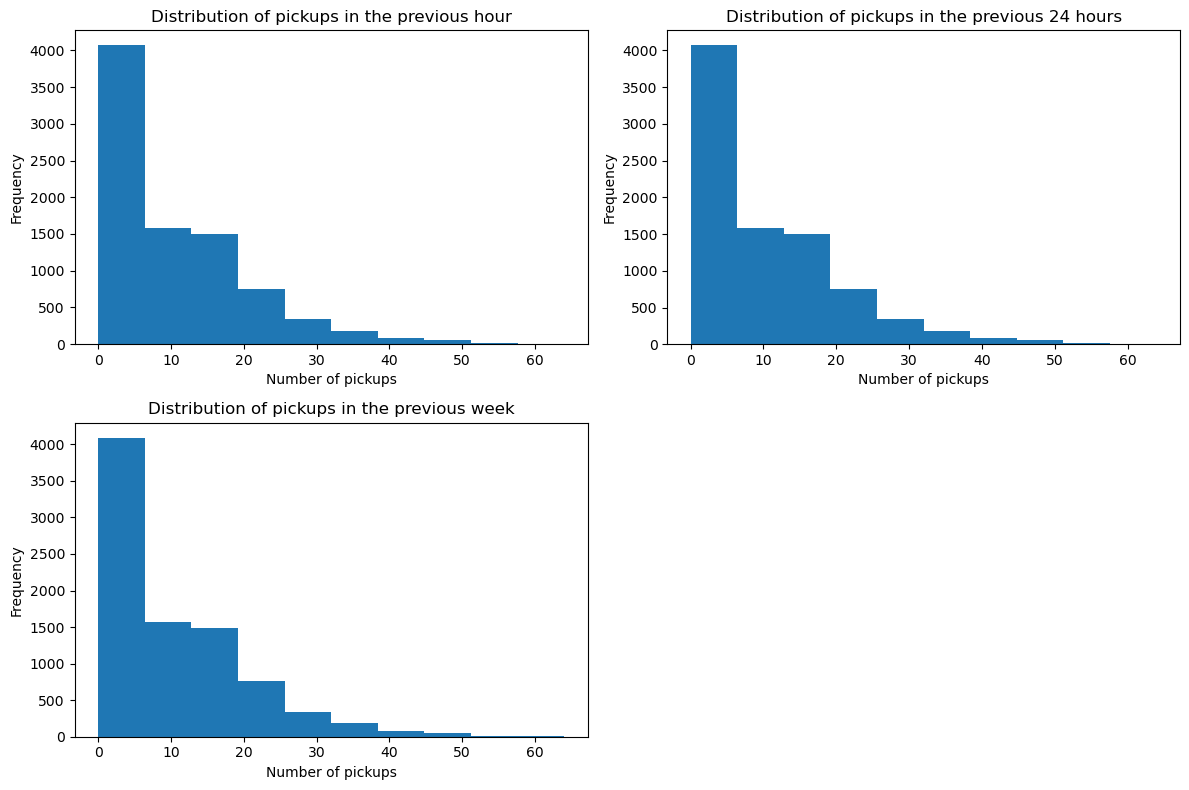

In [19]:
# Plot the distribution of the number of pickups for each lag
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.hist(pickups_df['pickups_1h_lag'])
plt.xlabel('Number of pickups')
plt.ylabel('Frequency')
plt.title('Distribution of pickups in the previous hour')
plt.subplot(2, 2, 2)
plt.hist(pickups_df['pickups_24h_lag'])
plt.xlabel('Number of pickups')
plt.ylabel('Frequency')
plt.title('Distribution of pickups in the previous 24 hours')
plt.subplot(2, 2, 3)
plt.hist(pickups_df['pickups_168h_lag'])
plt.xlabel('Number of pickups')
plt.ylabel('Frequency')
plt.title('Distribution of pickups in the previous week')
plt.tight_layout()
plt.savefig(os.path.join('plots', 'pickups_lag_distribution.png'))
plt.show()



Linear Regression Model for the pickups and dropoffs based on the lags

In [20]:
from sklearn.linear_model import LinearRegression

def predict_linear_regression(dataframe):
      # Predict the number of pickups using the lagged values for every hour in the day
      if dataframe is pickups_df:
            X = dataframe[['pickups_1h_lag', 'pickups_24h_lag', 'pickups_168h_lag']]
      else:
            X = dataframe[['dropoffs_1h_lag', 'dropoffs_24h_lag', 'dropoffs_168h_lag']]
      y = dataframe['hour']
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
      regressor = LinearRegression()
      regressor.fit(X_train, y_train)
      y_pred = regressor.predict(X_test)
      print('Mean squared error: %.2f'
            % mean_squared_error(y_test, y_pred))

      # Print R^2
      print('R^2: %.2f'
            % regressor.score(X_test, y_test))

      # Plot the predicted values and the actual values per time
      plt.figure(figsize=(12, 8))
      plt.plot(y_test.values, color='blue', label='Actual')
      plt.plot(y_pred, color='red', label='Predicted')
      plt.xlabel('Time')
      plt.ylabel('Number of pickups')
      plt.title('Predicted vs. actual number')
      plt.legend()
      plt.tight_layout()
      plt.savefig(os.path.join('plots', 'pickups_predictions.png'))
      plt.show()

      return regressor

Mean squared error: 27.36
R^2: 0.75


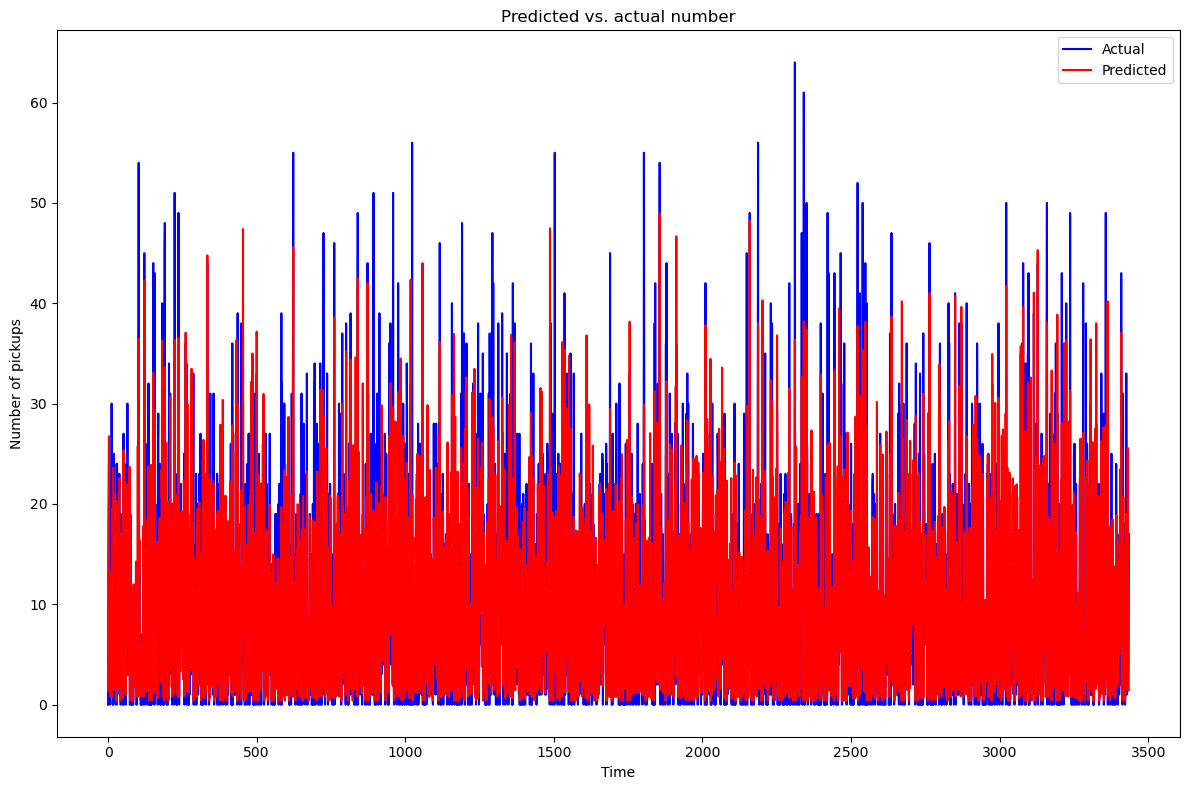

Mean squared error: 26.71
R^2: 0.75


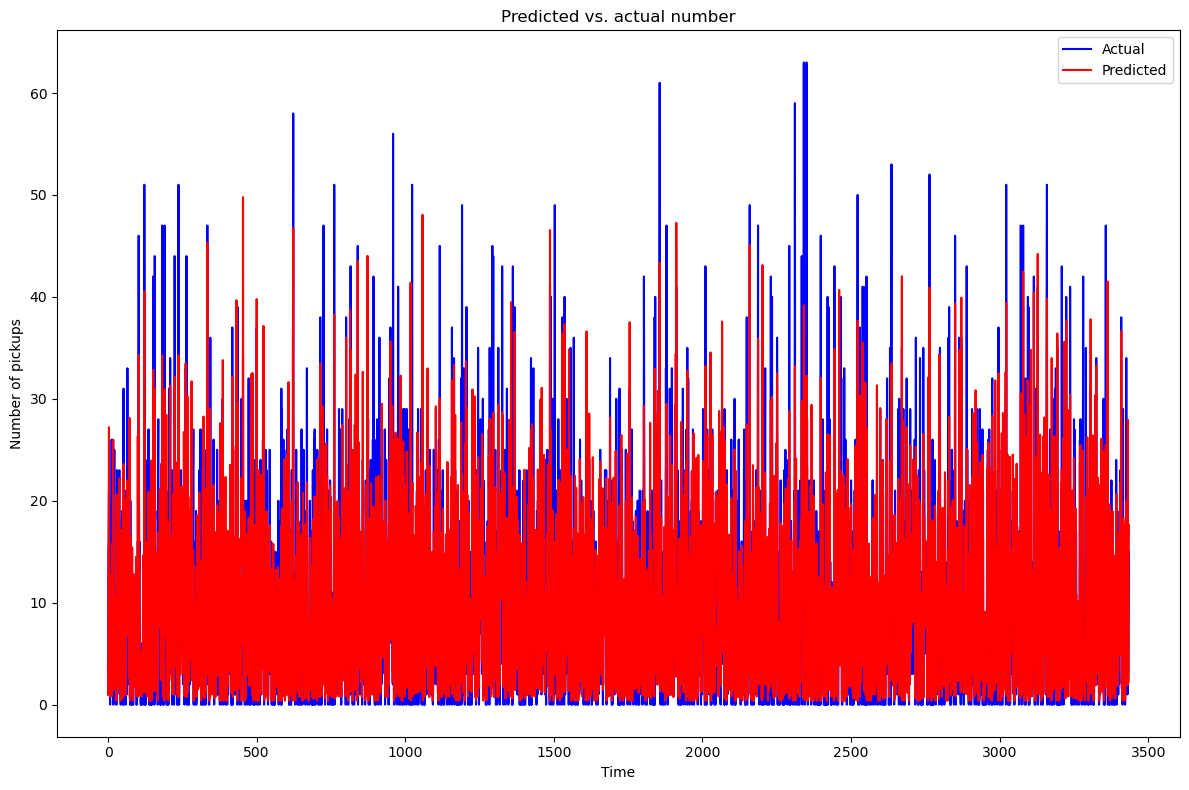

In [21]:
predicted_pickups = predict_linear_regression(pickups_df)
predicted_dropoffs = predict_linear_regression(dropoffs_df)